### Anna Gumenyuk (s3893464), MIK Claessens (S4370244), Ekin Fergan (s3985113)

## Question 1

In Figure (a), both the validation loss and the training loss are high and don't decrease with increasing number of iterations. This is an example of underfitting, where the algorithm used does not fit the data well, resulting in high errors. Hence, further training is needed to decrease the loss. This can be achieved, by e.g. increasing the data size or changing the algorithm. 

In Figure (b), the model performs well on the training data since the error decreases with increasing training iterations. However, the model cannot generalize well on new data. This can be observed from the validation loss where it initially decreases but starts to increase later on. The minimum point represents the start of overfitting.

In Figure (c), it does not seem to be like underfitting seeing that training loss decreases as the number of epochs increases. At the same time, it does not appear to be overfitting either as it was in Figure (b). If it were overfitting, then the validation loss would rise. However, in Figure (c), the validation loss fluctuates. As such, we conclude that this is neither underfitting nor overfitting. 

## Question 2

While training a machine learning model, it is necessary to split the dataset. If we train our model on the entire dataset, then we cannot accurately evaluate the performance of our model/algorithm. If we test the model on the same data we used for training, then we test the memorization of the data rather than the generalization of the model.  Hence, an advantage of splitting is that overfitting can be detected or prevented. If we split the data, we can use hyperparameter tuning to find the model that has the best performance. The main disadvantage of splitting data is the reduction of training data. This can be a problem when data is hard to get and the dataset is small in size. As a result, training a reliable model can be difficult with such a small amount of training data.

## Question 3

In [183]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score, f1_score
import pandas as pd
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [184]:
# Looking at the data and target variables
data = load_breast_cancer(as_frame = True)
print(data['target_names'])
print(data['target'].sum())
print(data['data'].head())


['malignant' 'benign']
357
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  wors

In [185]:
# Separating the data into predicting variables and target variables. Normalizing the predicting variables. 
X, y = load_breast_cancer(return_X_y=True)
X = preprocessing.normalize(X)

# Splitting the data into trainign and testing sets.
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [186]:
# These are hyper parameters that will be used for tuning of the models
from sklearn.model_selection import GridSearchCV

SVC_tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [0.1, 1, 10, 100], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "gamma": [0.1, 1, 10, 100], "C": [1, 10, 100, 1000]},
    {"kernel": ["poly"], "gamma": [0.1, 1, 10, 100], "C": [1, 10, 100, 1000], "degree": [2, 3, 4]},
    {"kernel": ["sigmoid"], "gamma": [0.1, 1, 10, 100], "C": [1, 10, 100, 1000]}
]

DTC_tuned_parameters = {
    'criterion':['gini','entropy'], 
    'max_leaf_nodes': list(range(2, 50)), 
    'min_samples_split': [2, 3, 4]
}

RFC_tuned_parameters = {
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7],
    'criterion' :['gini', 'entropy']
}

SVC_grid = GridSearchCV(SVC(), SVC_tuned_parameters, refit=True)
DTC_grid = GridSearchCV(DecisionTreeClassifier(), DTC_tuned_parameters, refit=True)
RFC_grid = GridSearchCV(RandomForestClassifier(), RFC_tuned_parameters, refit=True)

In [187]:
# Initializing different models that will be used for further training and evaluating. 
models = []

models.append([SVC_grid, "SVC"])
models.append([DTC_grid, "Decision Tree"])
models.append([RFC_grid, "Random Forest"])

# Initializing the array of train sizes that will be used later in the training. 
train_sizes = [0.1, 0.3, 0.5, 1.0]

In [188]:
# A function that is used for splitting the training data based on the indicated train size.
def split_train(size):
    x_tr_ret, discarded_x, y_tr_ret, discarded_y = train_test_split(X_tr, y_tr, train_size=size)
    return x_tr_ret, y_tr_ret

In [189]:
# A function that is used to train a specified model and record the accuracy, precision, and recall statistics.
def train_test(model, train_size):
    if train_size < 1:
        x_reduced, y_reduced = split_train(train_size)
        model.fit(x_reduced, y_reduced)
    elif train_size == 1:
        model.fit(X_tr, y_tr)
    return model

In [190]:
# A function that is used to test the model and store the performance statistics
data = []
columns = ["Algorithm", "Train Size", "Accuracy", "Balanced Accuracy", "Precision", "Recall", "F1-Score"]

def test(model, name, train_size):
    predictions = model.predict(X_te)
    accuracy = accuracy_score(predictions, y_te)
    precision = precision_score(predictions, y_te)
    recall = recall_score(predictions, y_te)
    balanced_accuracy = balanced_accuracy_score(predictions, y_te)
    f1score = f1_score(predictions, y_te)
    data.append([name, train_size, accuracy, balanced_accuracy, precision, recall, f1score])

In [191]:
# The main loop where training/tuning of the models occurs. 
best_models_per_trainsize = []

def tuning_training():
    for model in models:
        for train_size in train_sizes:
            best_model = train_test(model[0], train_size)
            best_models_per_trainsize.append([train_size, best_model, model[1]])
            print ("For train size: " + str(train_size) + " the best model is " + str(best_model.best_estimator_))
            test(best_model, model[1], train_size)


In [192]:
tuning_training()

For train size: 0.1 the best model is SVC(C=100, gamma=100)
For train size: 0.3 the best model is SVC(C=100, gamma=10)
For train size: 0.5 the best model is SVC(C=100, degree=2, gamma=100, kernel='poly')
For train size: 1.0 the best model is SVC(C=1000, gamma=10, kernel='poly')
For train size: 0.1 the best model is DecisionTreeClassifier(max_leaf_nodes=2)
For train size: 0.3 the best model is DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5)
For train size: 0.5 the best model is DecisionTreeClassifier(max_leaf_nodes=5)
For train size: 1.0 the best model is DecisionTreeClassifier(max_leaf_nodes=15)
For train size: 0.1 the best model is RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=500)
For train size: 0.3 the best model is RandomForestClassifier(max_depth=5, n_estimators=500)
For train size: 0.5 the best model is RandomForestClassifier(max_depth=7, n_estimators=500)
For train size: 1.0 the best model is RandomForestClassifier(criterion='entropy', max_

In [193]:
df = pd.DataFrame(data, columns = columns)
df

,Algorithm,Train Size,Accuracy,Balanced Accuracy,Precision,Recall,F1-Score
0,SVC,0.1,0.877193,0.875362,0.910448,0.884058,0.897059
1,SVC,0.3,0.912281,0.920815,0.970149,0.890411,0.928571
2,SVC,0.5,0.947368,0.948792,0.970149,0.942029,0.955882
3,SVC,1.0,0.964912,0.967150,0.985075,0.956522,0.970588
4,Decision Tree,0.1,0.894737,0.890504,0.865672,0.950820,0.906250
5,Decision Tree,0.3,0.894737,0.890110,0.895522,0.923077,0.909091
6,Decision Tree,0.5,0.903509,0.898883,0.880597,0.951613,0.914729
7,Decision Tree,1.0,0.929825,0.934491,0.970149,0.915493,0.942029
8,Random Forest,0.1,0.903509,0.921053,0.985075,0.868421,0.923077
9,Random Forest,0.3,0.938596,0.941558,0.970149,0.928571,0.948905


C:\Users\Anna\AppData\Local\Temp\ipykernel_1908\84649920.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.


Text(0, 0.5, 'F1-Score')

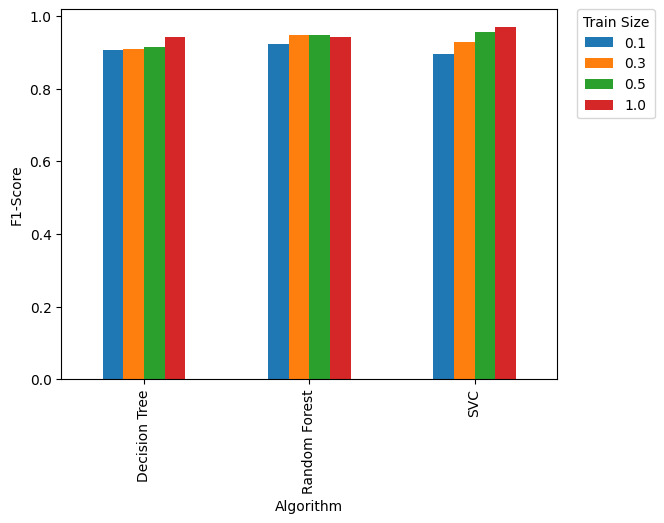

In [248]:
# The block of code thet plots the results (in terms of F1-Scores).

df.apply(pd.to_numeric, errors='ignore')
df['Train Size'] = df['Train Size'].astype('category')
df.pivot("Algorithm", "Train Size", "F1-Score").plot(kind='bar')
plt.legend(title = 'Train Size', bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.ylabel("F1-Score")

We decided to plot the performance of the best models for each algorithm in terms of their F1-Score. We plotted the scores per algorithm and per train size.

It is important to note that F1-scores are all close to 0.9 across the algorithms and across the test sizes. These scores are pretty high due to the fact that per each testing size, the best model was chosen. 

However, in the case of SVC and the Decision Tree, the F1-Score increases as the test size increases. This is to be expected because the more training data the model has, the best it will perform during the testing phase. 

A similar trend can be observed if we plot other statistics, including Accuracy, Balanced Accuracy, Precision, and Recall: the higher the training size, the higher the score of the observed performance statistics. 